In [40]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [41]:
import numpy as np
import pandas as pd

In [42]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [43]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [44]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [45]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [46]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [48]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [49]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [34]:
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [36]:
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [268]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Get and format the earliest year, conver to year -1

getDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
for i in getDate:
    currentYear = dt.datetime.strptime(i, "%Y-%m-%d").strftime("%Y")
    currentMonth = dt.datetime.strptime(i, "%Y-%m-%d").strftime("%m")
print(currentYear,currentMonth,currentDay)

lastYear = int(currentYear)-1
currentYear = int(currentYear)
currentMonth = int(currentMonth)
currentDay = 1

currentYearDate = dt.date(currentYear, currentMonth ,currentDay)
lastYearDate = dt.date(lastYear, currentMonth ,currentDay)

print(currentYearDate)
print(lastYearDate)


2017 08 1
2017-08-01
2016-08-01


In [304]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
results = session.query(Measurement.date, func.sum(Measurement.prcp)).\
    filter(Measurement.date >= lastYearDate).\
    filter(Measurement.date < currentYearDate).\
    group_by(Measurement.date).order_by(Measurement.date.asc()).all()

In [305]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
df = pd.DataFrame(results[:], columns=['date', 'prcp'])
df.reset_index()
df.head(5)

,date,prcp
0,2016-08-01,8.71
1,2016-08-02,2.84
2,2016-08-03,0.05
3,2016-08-04,1.81
4,2016-08-05,0.34


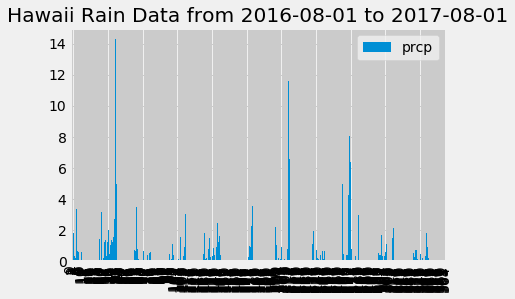

In [306]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar(title="Hawaii Rain Data from " + str(lastYearDate) + " to " + str(currentYearDate))

In [307]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,date,prcp,month,year
0,2016-08-01,8.71,8,2016
1,2016-08-02,2.84,8,2016
2,2016-08-03,0.05,8,2016
3,2016-08-04,1.81,8,2016
4,2016-08-05,0.34,8,2016


In [308]:
dfYearMonth = df.groupby(['year','month'])['prcp'].sum()
dfYearMonth.reset_index()
dfYearMonth.head                     

<bound method NDFrame.head of year  month
2016  8        55.39
      9        49.40
      10       21.77
      11       20.56
      12       35.51
2017  1        11.95
      2        39.06
      3        29.62
      4        54.91
      5        25.27
      6        20.52
      7        23.72
Name: prcp, dtype: float64>

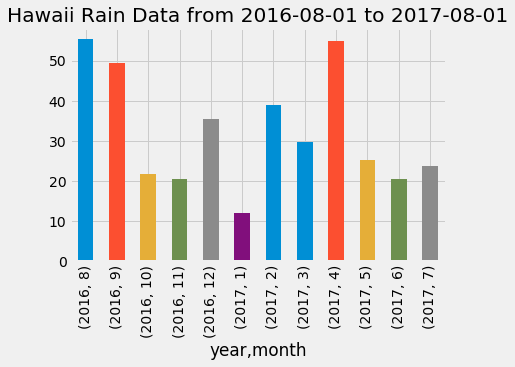

In [309]:
# Use Pandas Plotting with Matplotlib to plot the data
dfYearMonth.plot.bar(title="Hawaii Rain Data from " + str(lastYearDate) + " to " + str(currentYearDate))


In [315]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df['prcp'].describe()

count    365.000000
mean       1.062137
std        1.840263
min        0.000000
25%        0.060000
50%        0.430000
75%        1.210000
max       14.280000
Name: prcp, dtype: float64

In [350]:
conn = engine.connect()
data = pd.read_sql("SELECT * FROM station", conn)
data.head(100)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [347]:
dataM = pd.read_sql("SELECT * FROM measurement", conn)
dataM.head(10)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [334]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station, Station.name).order_by(Station.station.desc()).all()
session.query(Station).count()

9

In [329]:
# What are the most active stations? (i.e. what stations have the most rows)?
session.query(Station.station, func.count(Station.id)).all()

[('USC00519397', 9)]

In [339]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [410]:
#Most active station
active1 = session.query(Measurement.station).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
print(active1)
for i in active1:
    active1 = active1[0]
print(active1)

('USC00519281',)
USC00519281


In [353]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
session.query( func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).all()

[(53.0, 87.0, 73.09795396419437)]

('USC00511918',)
USC00511918


Text(0, 0.5, 'Frequency')

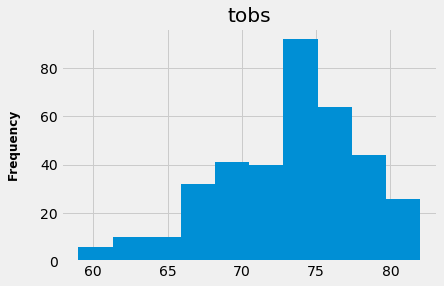

In [366]:
# Choose the station with the highest number of temperature observations.
maxTStation = session.query(Measurement.station).\
    group_by(Measurement.station).order_by(func.max(Measurement.tobs).desc()).first()
print(maxTStation)
for i in maxTStation:
    maxTStation = maxTStation[0]
print(maxTStation)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
resultsMaxTStation = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= lastYearDate).\
    filter(Measurement.date < currentYearDate).\
    filter(Measurement.station == active1).\
    group_by(Measurement.date).order_by(Measurement.date.asc()).all()

#dataframe
resultsMaxTStationdf = pd.DataFrame(resultsMaxTStation[:], columns=['date', 'tobs'])
resultsMaxTStationdf.reset_index()
resultsMaxTStationdf.head(5)

#histogram
resultsMaxTStationdf.hist(column='tobs')
plt.ylabel("Frequency", labelpad=20, weight='bold', size=12)

In [367]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [402]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-08-01', '2016-08-15'))


[(71.0, 78.17525773195877, 83.0)]


In [411]:
start_date = '2016-08-01'
end_date= '2016-08-15'
tmin = session.query(func.min(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
tmax = session.query(func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
tavg = session.query(func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
for i in tmin:
    tmin = i[0]
print(tmin)

for i in tmax:
    tmax = i[0]
print(tmax)

for i in tavg:
    tavg = i[0]
print(tavg)

71.0
83.0
78.17525773195877


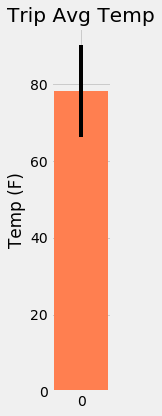

In [446]:
peak  = tmax-tmin
N=1
ind = np.arange(N) 
width = 0.35       # the width of the bars: can also be len(x) sequence
fig = plt.figure(figsize=(2,6))
p = plt.bar(ind, tavg, width, yerr=peak, color="coral")

plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp')
plt.xticks(ind)
plt.tight_layout()
plt.show()

In [415]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [455]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Station.station, Station.name, Station.latitude, Station.longitude , Station.elevation]
vacation = session.query(*sel, func.sum(Measurement.prcp)).filter(Measurement.station == Station.station).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date < end_date).\
    group_by(*sel).order_by(Measurement.prcp.desc()).all()
vacationdf = pd.DataFrame(vacation[:], columns=['station', 'name', 'latitude', 'longitude', 'elevation', 'precipitation'])
vacationdf.reset_index()
vacationdf.head(10)

,station,name,latitude,longitude,elevation,precipitation
0,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,6.53
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,4.18
2,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,6.86
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,1.32
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.59
5,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.18
6,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,1.16


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


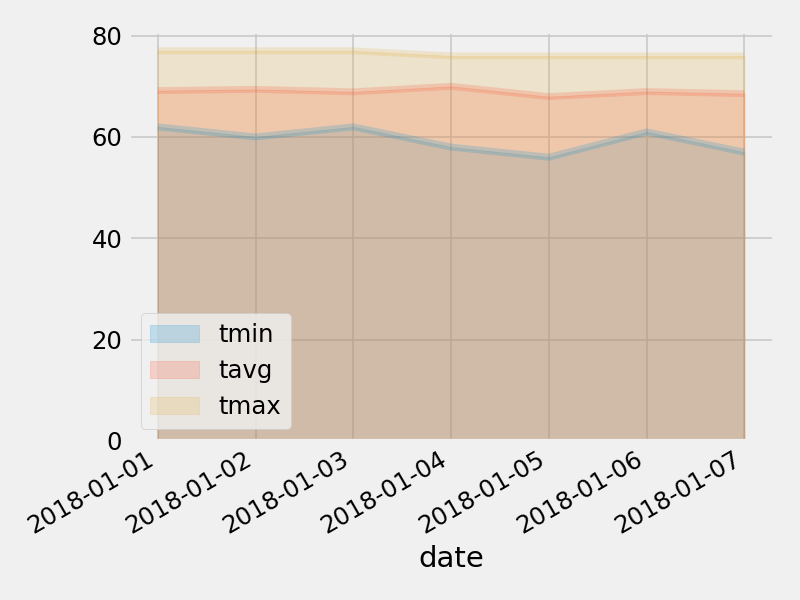

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
